In [1]:
from tensorflow.python.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print('x_train.shape :', x_train.shape)
print('x_test.shape  :', x_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape  :', y_test.shape)

x_train.shape : (50000, 32, 32, 3)
x_test.shape  : (10000, 32, 32, 3)
y_train.shape : (50000, 1)
y_test.shape  : (10000, 1)


In [3]:
from tensorflow.python.keras.utils import to_categorical

x_train = x_train/255.
x_test = x_test/255.

#因為有10個分類
#one-hot-encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [4]:
from tensorflow.python.keras.models import Sequential


model = Sequential()

In [5]:
#CNN建置卷積層方式-Conv2D
#filters: 輸出feature map 的數量
#kernel_size(卷積核): 一般設定為奇數，如: 3x3或5x5
#strides:卷積核位移幅度
#activation:每層的激活函數

#因為一旦經過卷積，圖片尺寸就會慢慢縮小，如果不想變小尺寸
#padding=same: 圖片周圍使用零來填充，讓輸入值與輸出值的尺寸相等
#padding=valid: 不以零填充

from tensorflow.python.keras.layers import Conv2D


#第一層
model.add(
    Conv2D(
        filters=32,
        input_shape=(32, 32, 3),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

#第二層
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#池化層
#池化層(2X2)

from tensorflow.python.keras.layers import MaxPooling2D


model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
#隨機地讓各層中的某些神經元失效
#抑制參數過多，可能造成準確度問題(過擬合)
#讓25%的神經元失效(不計算)

from tensorflow.python.keras.layers import Dropout


model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#第三層
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

#第四層
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

#池化層與dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [9]:
#確認到目前為止，模型輸出的大小
#因為接下來要接Fully Connection，因此要確定大小
#輸出結果格式為四維的張量，分別是: 資料筆數、長、寬、色版

#Fully Connection只能接收二維格式的張量，因此要轉換一下


model.output_shape

(None, 8, 8, 64)

In [10]:
#新增一層為Flatten層，準備與Fully Connection相接
#透過flatten方法轉換

from tensorflow.python.keras.layers import Flatten


model.add(Flatten())
model.output_shape

(None, 4096)

In [11]:
#新增Fully Connection層


from tensorflow.python.keras.layers import Dense


model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [12]:
from tensorflow.python.keras.callbacks import TensorBoard


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
tsb = TensorBoard(log_dir='cifar')
history_model1 = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[tsb]
)

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
40000/40000 [==============================] - 31s 785us/sample - loss: 1.5683 - acc: 0.4290 - val_loss: 1.2143 - val_acc: 0.5682
Epoch 2/20
40000/40000 [==============================] - 28s 696us/sample - loss: 1.1458 - acc: 0.5895 - val_loss: 0.9526 - val_acc: 0.6651
Epoch 3/20
40000/40000 [==============================] - 28s 692us/sample - loss: 0.9856 - acc: 0.6512 - val_loss: 0.8537 - val_acc: 0.7016
Epoch 4/20
40000/40000 [==============================] - 27s 684us/sample - loss: 0.8854 - acc: 0.6868 - val_loss: 0.8997 - val_acc: 0.6907
Epoch 5/20
40000/40000 [==============================] - 28s 701us/sample - loss: 0.8093 - acc: 0.7163 - val_loss: 0.7697 - val_acc: 0.7330
Epoch 6/20
40000/40000 [==============================] - 29s 714us/sample - loss: 0.7565 - acc: 0.7332 - val_loss: 0.7156 - val_acc: 0.7529
Epoch 7/20
40000/40000 [==============================] 

In [13]:
#檢視整體網路狀態

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [14]:
#模型準確率

score=model.evaluate(x_test,y_test,verbose=0)
score[1]

0.7719

In [15]:
#進行預測

pred=model.predict_classes(x_test)

In [16]:
#前10筆預測結果分類值
#第一張測試圖片，分類結果為第三類
#第二張測試圖片，分類結果為第八類

pred[:10]

array([3, 8, 0, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [17]:
#定義畫圖函數

import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        
        #抓出對應的label
        a=[i for i, x in enumerate(y_test[i]==1.0) if x]
        title=str(i)+',lab:'+label_dict[a[0]]
        if len(prediction)>0:
            title+='=>pre:'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

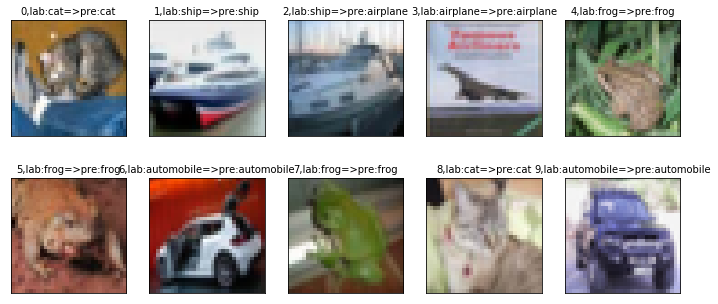

In [18]:
plot_images_labels_prediction(x_test,y_test, pred,0,10)

In [19]:
#預測每個類別之機率狀況
import numpy as np

Predicted_Probability=model.predict(x_test)

def show_Predicted_Probability(y,prediction, x_img,Predicted_Probability,i):
    a=[i for i, x in enumerate(y[i]==1.0) if x]
    print('label:',label_dict[a[0]], 'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


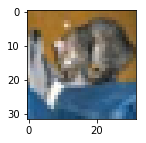

airplane Probability:0.000005360
automobile Probability:0.000000892
bird Probability:0.000026650
cat Probability:0.981808484
deer Probability:0.000000085
dog Probability:0.018112602
frog Probability:0.000015805
horse Probability:0.000000634
ship Probability:0.000029504
truck Probability:0.000000006


In [20]:
#原本是貓，預測結果最高的也是貓，次高是狗
show_Predicted_Probability(y_test,pred,
                           x_test,Predicted_Probability,0)

label: ship predict: ship


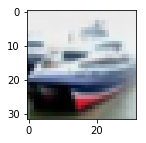

airplane Probability:0.000042832
automobile Probability:0.003254163
bird Probability:0.000000000
cat Probability:0.000000001
deer Probability:0.000000000
dog Probability:0.000000000
frog Probability:0.000000000
horse Probability:0.000000000
ship Probability:0.996700704
truck Probability:0.000002305


In [21]:
#原本是船，預測結果最高的也是船
show_Predicted_Probability(y_test,pred,
                           x_test,Predicted_Probability,1)

In [22]:
#混淆矩陣
#查看原有測試資料

print(pred.shape)
print(y_test.shape)

(10000,)
(10000, 10)


In [23]:
#因為測試資料集y_test不符合我們需求
#需要改成一維陣列
#我們希望變成跟pred結果一樣，因為要放入dataframe裡面


y_test_new=[]
for i in range(0,len(y_test)):
    a=[i for i, x in enumerate(y_test[i]==1.0) if x]
    y_test_new.append(a)
y_test_new=np.array(y_test_new)
y_test_new=y_test_new.reshape(-1)

In [24]:
import pandas as pd

print(label_dict)
pd.crosstab(y_test_new,pred,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,839,8,41,24,7,8,5,12,33,23
1,16,898,2,9,2,6,4,2,20,41
2,55,2,657,70,50,91,42,20,6,7
3,18,2,57,658,28,156,44,24,5,8
4,22,2,60,100,653,57,42,57,6,1
5,11,2,31,187,27,697,17,25,1,2
6,6,2,30,95,13,36,807,2,7,2
7,13,0,29,35,32,66,1,818,4,2
8,73,16,16,14,4,8,3,2,851,13


In [28]:
#儲存模型

model.save("cifar.h5")
print("model saved")

model saved


In [32]:
#讀取模型

from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
    model = load_model('cifar.h5')

print(model)